# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
"""WHAT IS IMAGE AUGMENTATION
Its a technique that is used to artificially expand the dataset . This is helput when we are given a data-set with 
very few data samples.
Different Image Augmentation parameteres used to increase data sample count are : 
zoom,shear,rotation,prepreocessing funtion and so on."""
"""Image Augmentation can be done with keras 
There are many features in Image augmentation like rotation"""

'Image Augmentation can be done with keras \nThere are many features in Image augmentation like rotation'

In [6]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

# Task 2: Rotation

In [ ]:
#This class has lot of functions for data augmentation and we can also do data normalisation with it
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40
)
#this rotation_range = 40 means our image can be rotated randomly between -40 to +40 with the generator object

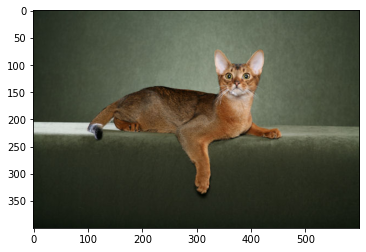

In [7]:

image_path = 'images/cat.jpg'

plt.imshow(plt.imread(image_path));

In [ ]:
#flow_from_directory goes into all folders
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));
#You see the image of size 256x256 and theres sort of an angle

# Task 3: Width and Height Shifts

In [ ]:
#we can shift the pixels along the horizontal and vertical axis
#we can set this range with tuple or list
generator_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100,-50,0,50,100]#we are explicitly giving the possible values
    height_shift_range=[-50,0,50]
)

In [ ]:
#3this code goes in all the images in the specified folder and applies the generator object and its parameters to it
x, y = next(generator_1.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.5,2))
#this tuple gives the range instead of explicitly giving the values like a list

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=40)
#just like rotation shear is also in degrees 
#in shear transformation the bottom coordinates are intact while the top coordinates can move in the shear_range degree
#it essentially creates a parallelogram

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=100)
#this shifts the channel value of any rgb channel in range -100 to 100

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
x.mean()
#this calculates mean of all pixels in the image

In [ ]:
np.array(Image.open(image_path).mean())
#mean value of original image

# Task 8: Flips

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,horizontal_flip=True)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [ ]:
#Nomalisation can be either featuewise or samplewise
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True # all values will be updated mean value will be reduced
    featurewise_std_normalisation=True
)

generator.fit(x_train)#this here is done to save the changes made by the generator

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

### Samplewise

In [ ]:
#here we dont need to fit it to x_train and no need to calculate the std,mean as sampling is done
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

# Task 10: Rescale and Preprocessing Function

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
#1 way to do normalisation as well with rescale
#preprocessing fucntion take a 3-D Numpy array and returns that only
#just give parameters and it will be applied to every image generated by the generator

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [ ]:
print(x.mean(), x.std(), y)

# Task 11: Using in Model Training

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)
#this gives us the data generator

In [ ]:
#Model
#pass list of layers in the sequential class
#1st layer a 3d to 2d tensor
model=tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(32,32,3)#shape of all the images in the dataset,
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
#loss is set that as we dont use OneHotEncoder and our values will be from 0-9

In [ ]:
_=model.fit(generator.flow(x_train,y_train,batch_size=32),
           epochs=1,steps_per_epoch=10)